# **Data Visualisation**
*Facteurs du bonheur des individus dans différents pays.*



Dans ce notebook, nous allons observer et visualiser les données de 6 datasets : 

1.   "world-hapiness-report-2021" renommé **df1**
2.   "world-hapiness-report" renommé **df2**
3.   Les informations des conflits armés de wikipédia dans **df_conflict**
4.   "unemployment analysis 2" renommé **df_chomage**
5.   Le df1 nettoyé en vue de la modélisation
















In [ ]:
#Importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Importer les dataset
df1 = pd.read_csv('world-happiness-report-2021.csv', sep=',')
df2 = pd.read_csv('world-happiness-report.csv')
df1_bis = pd.read_csv('world-happiness-report-2021.csv', sep=',') #df avec ajout de variables
df_chomage = pd.read_csv('unemployment analysis 2.csv')



 **1. Dataset "df1"**








In [ ]:
#Prise de connaissance du dataset

display(df1.head())
print(df1.info())
print(df1.shape)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

*Graphiques sur la base du Ladder score : l'échelle du bonheur*

In [ ]:
#Manipulation dans l'optique de la création d'un barplot

#Trier le df par ordre décroissant
df1_sorted = df1.sort_values(by = 'Ladder score', ascending = False)

# Regrouper les pays par région en faisant la moyenne du Ladder Score
df_region_ls = df1.groupby('Regional indicator').agg({'Ladder score' : 'mean'})

# Trier le dataframe selon le Ladder Score
df_region_ls = df_region_ls.sort_values(by = "Ladder score")

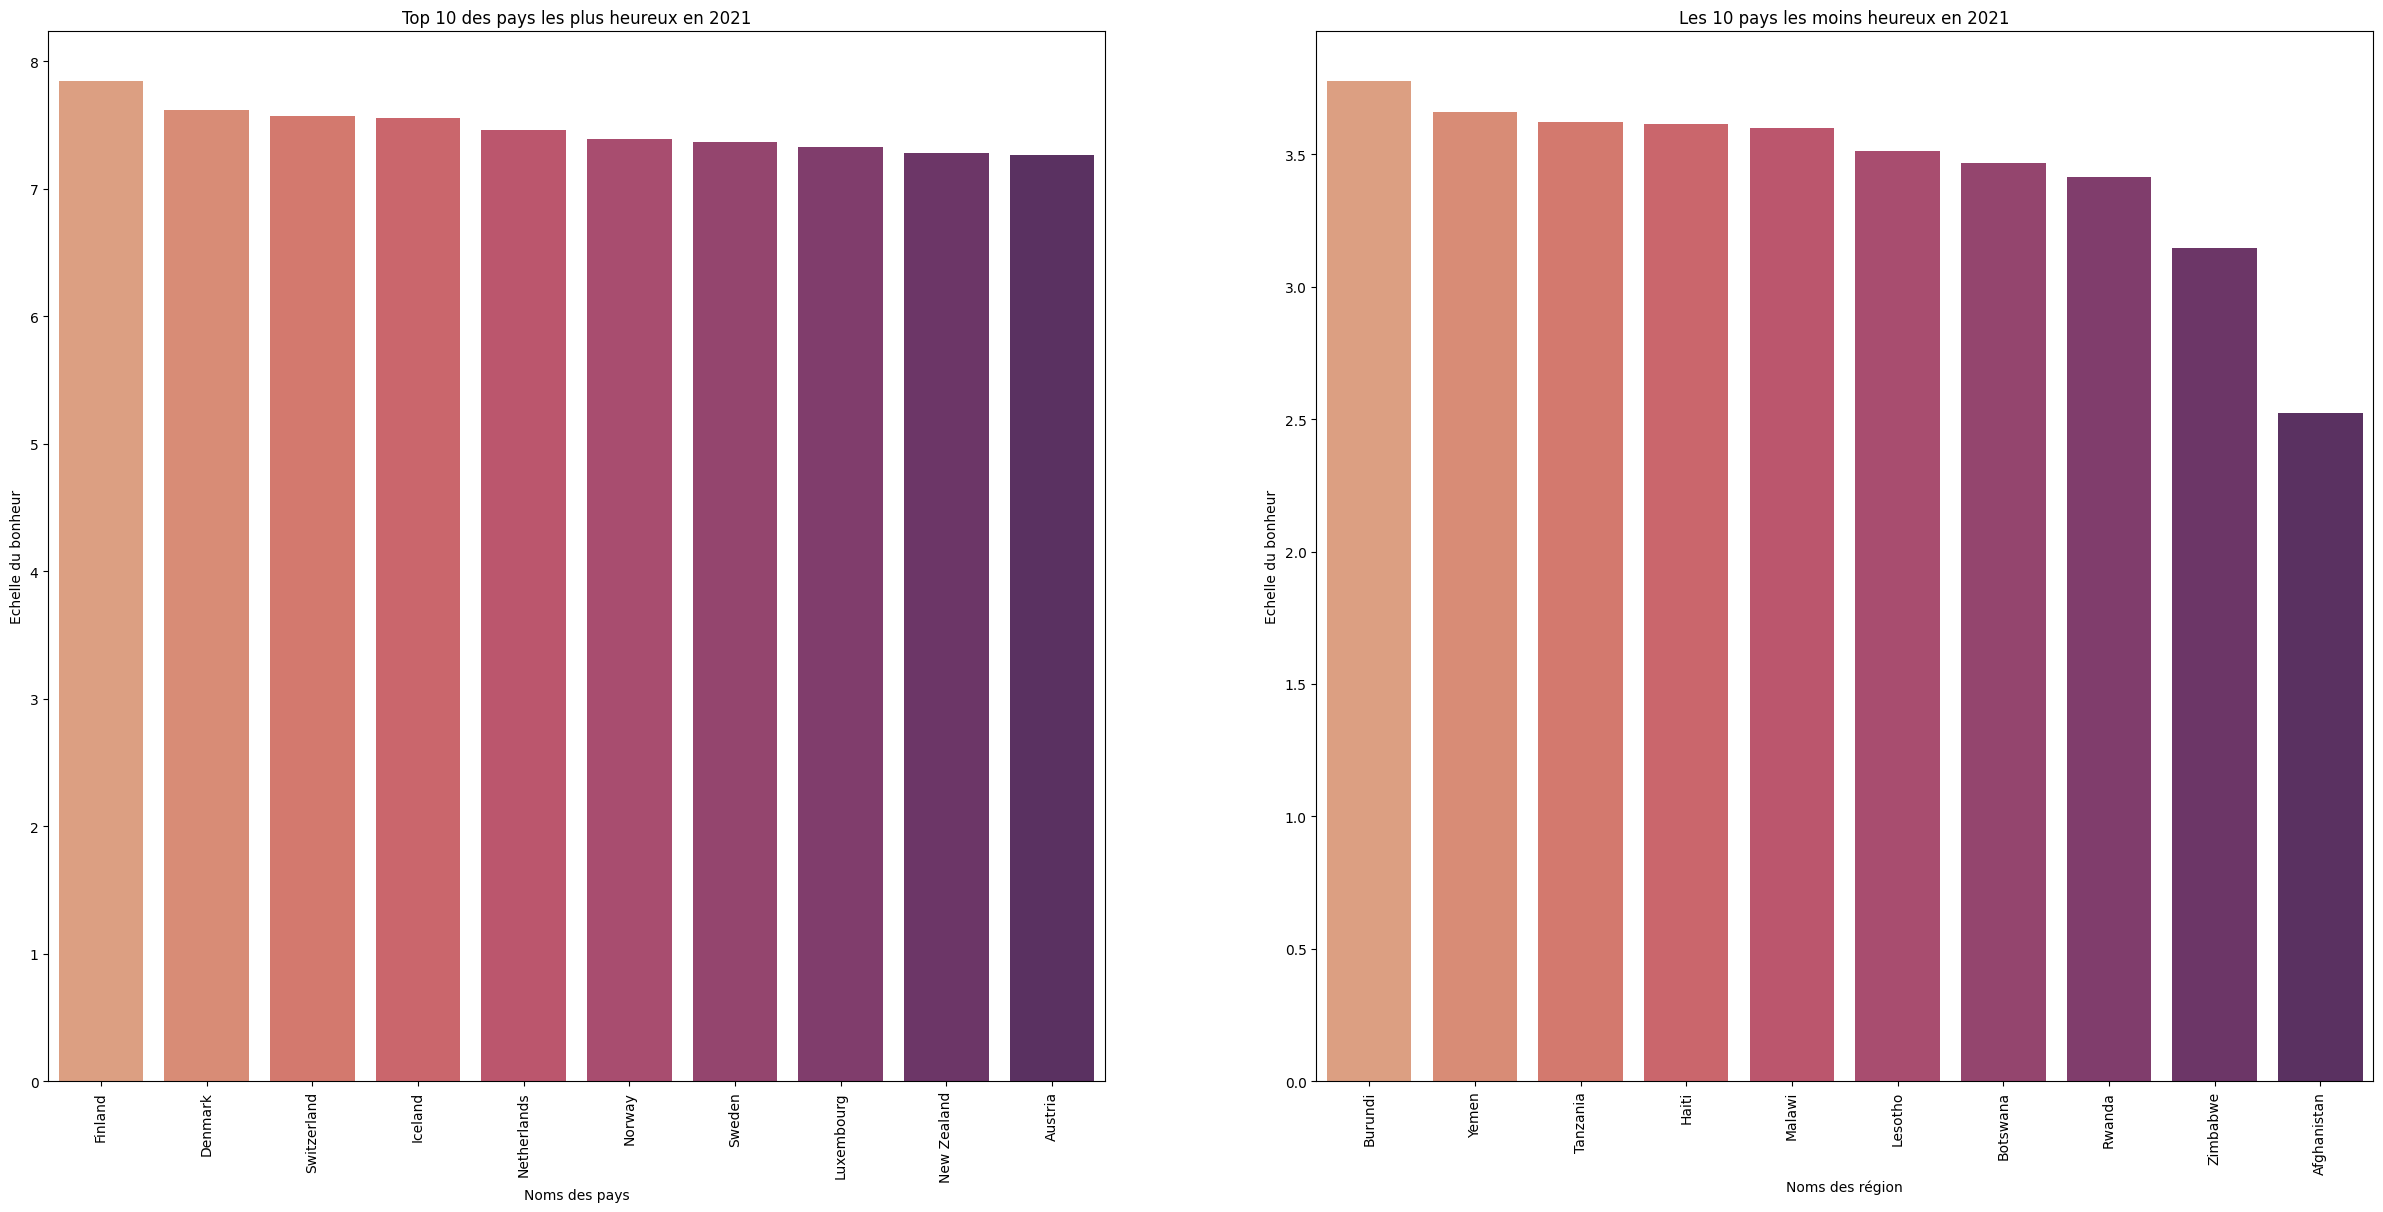

In [ ]:
#Barplot sur les pays les plus et moins heureux
fig = plt.figure(figsize=(30,30))

plt.subplot(221)
sns.barplot(x ='Country name', y = 'Ladder score', data=df1_sorted.head(10), palette=sns.color_palette("flare", 10))
plt.xlabel('Noms des pays')
plt.ylabel('Echelle du bonheur')
plt.title('Top 10 des pays les plus heureux en 2021')
plt.xticks(rotation=90);

plt.subplot(222)
sns.barplot(x ='Country name', y = 'Ladder score', data=df1_sorted.tail(10), palette=sns.color_palette("flare", 10))
plt.xlabel('Noms des région')
plt.ylabel('Echelle du bonheur')
plt.title('Les 10 pays les moins heureux en 2021')
plt.xticks(rotation=90);

In [ ]:
#Manipulation pour un barplot des ladder score par région

# Regrouper les pays par région en faisant la moyenne du Ladder Score
df_region_ls = df1.groupby('Regional indicator').agg({'Ladder score' : 'mean'})

# Trier le dataframe selon le Ladder Score
df_region_ls = df_region_ls.sort_values(by = "Ladder score")

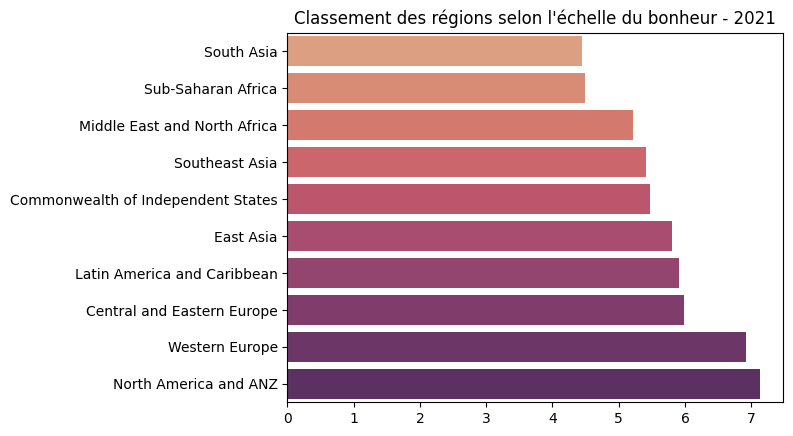

In [ ]:
# Afficher un barplot du résultat
sns.barplot(y = df_region_ls.index, x = df_region_ls["Ladder score"], palette = sns.color_palette("flare", 10))
plt.yticks(fontsize=10)
plt.ylabel("")
plt.xlabel("")
plt.title("Classement des régions selon l'échelle du bonheur - 2021", fontsize = 12)
plt.show()

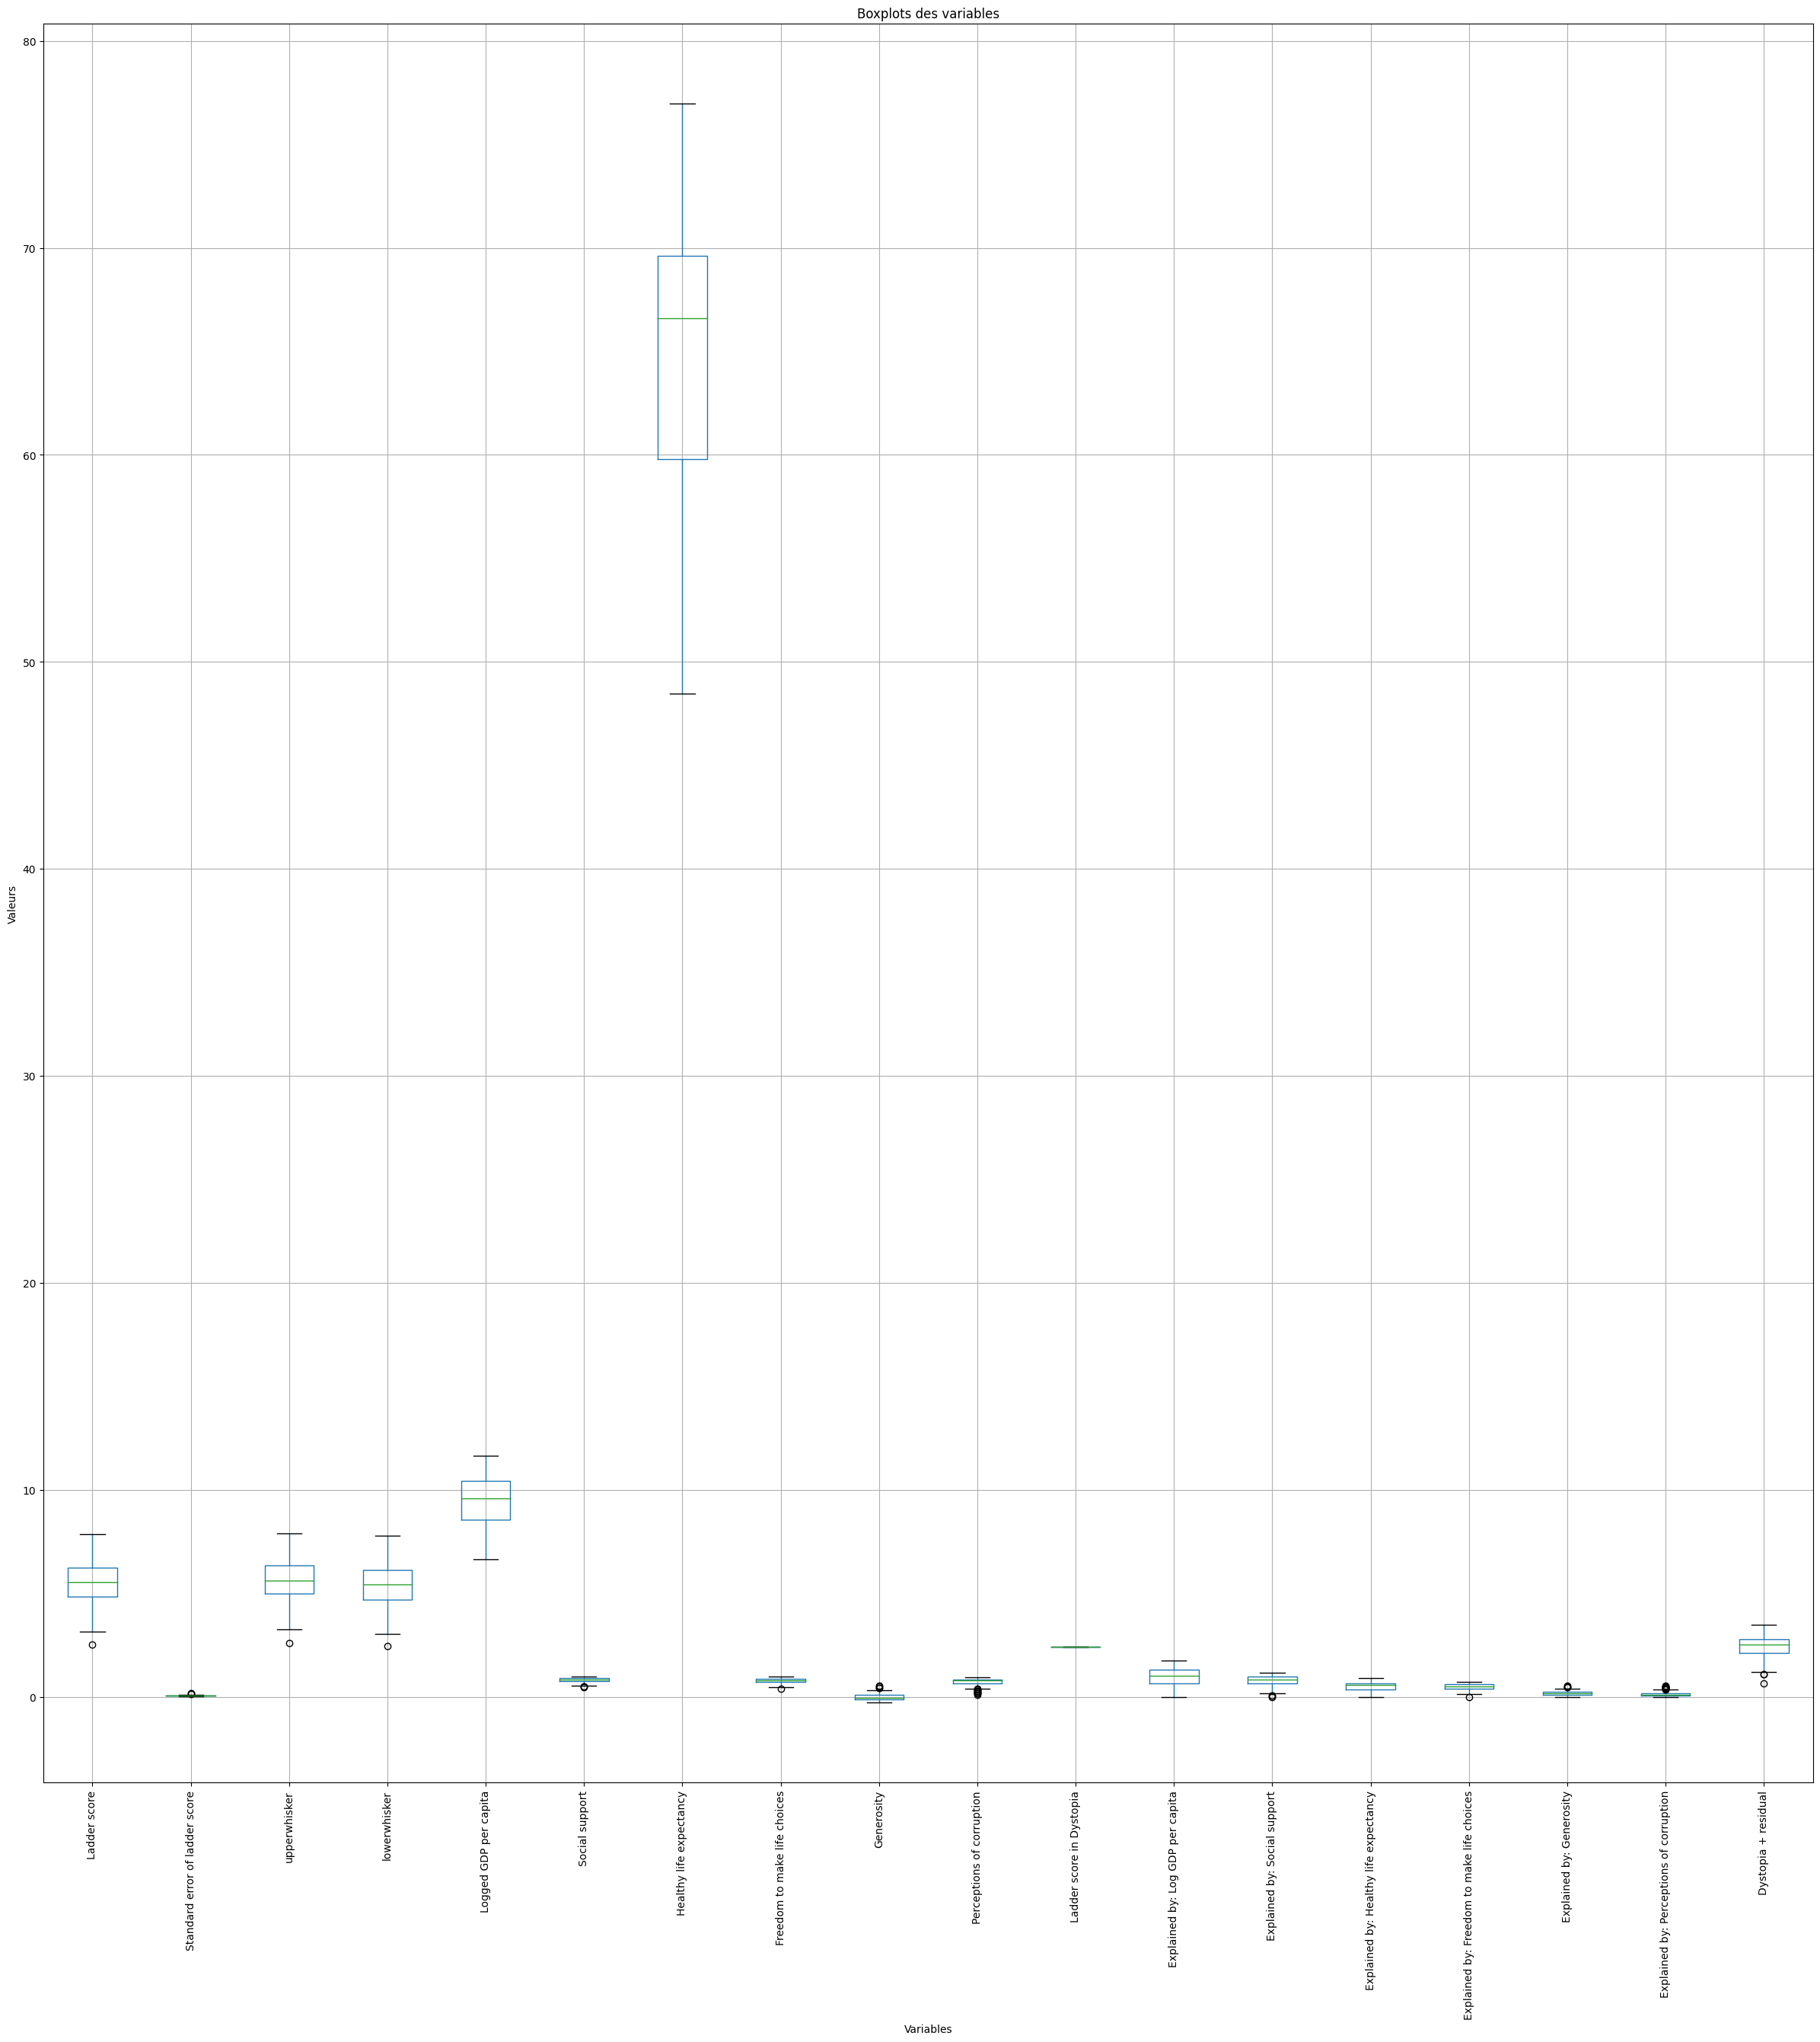

In [ ]:
#Boxplot des variables de df1

fig = plt.figure(figsize=(30,30))
df1.boxplot()
plt.title("Boxplots des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=90);

On constate que les variables ont des étendues très différentes, ce qui s'explique par des unités différentes.

In [ ]:
#Correlation des variables du df1
df1.corr()

<ipython-input-9-cbf12811059e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470787,0.999347,0.999396,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,NaN,0.789745,0.756869,0.768138,0.607793,-0.017631,0.421205,0.492010
Standard error of ladder score,-0.470787,1.000000,-0.438612,-0.501150,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,NaN,-0.645776,-0.531010,-0.583806,-0.275171,0.138580,-0.277041,0.136827
upperwhisker,0.999347,-0.438612,1.000000,0.997489,0.777995,0.749215,0.758455,0.607797,-0.012616,-0.417560,NaN,0.777981,0.749187,0.758494,0.607838,-0.012435,0.417624,0.506880
lowerwhisker,0.999396,-0.501150,0.997489,1.000000,0.800064,0.763299,0.776364,0.606944,-0.022794,-0.423976,NaN,0.800048,0.763288,0.776402,0.606983,-0.022638,0.424042,0.477204
Logged GDP per capita,0.789760,-0.645799,0.777995,0.800064,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,NaN,1.000000,0.785174,0.859488,0.432383,-0.199532,0.342332,-0.041119
Social support,0.756888,-0.530815,0.749215,0.763299,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,NaN,0.785287,0.999996,0.723284,0.482896,-0.114913,0.203366,0.006681
Healthy life expectancy,0.768099,-0.583805,0.758455,0.776364,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,NaN,0.859446,0.723155,0.999999,0.461485,-0.161767,0.364452,-0.023433
Freedom to make life choices,0.607753,-0.275182,0.607797,0.606944,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,NaN,0.432350,0.483069,0.461454,0.999994,0.169587,0.401372,0.100242
Generosity,-0.017799,0.138349,-0.012616,-0.022794,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,NaN,-0.199229,-0.114909,-0.161863,0.169261,0.999994,0.163924,-0.027212
Perceptions of corruption,-0.421140,0.276997,-0.417560,-0.423976,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,NaN,-0.342310,-0.203422,-0.364303,-0.401069,-0.164171,-0.999996,0.004478


<ipython-input-10-e7f406b64861>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


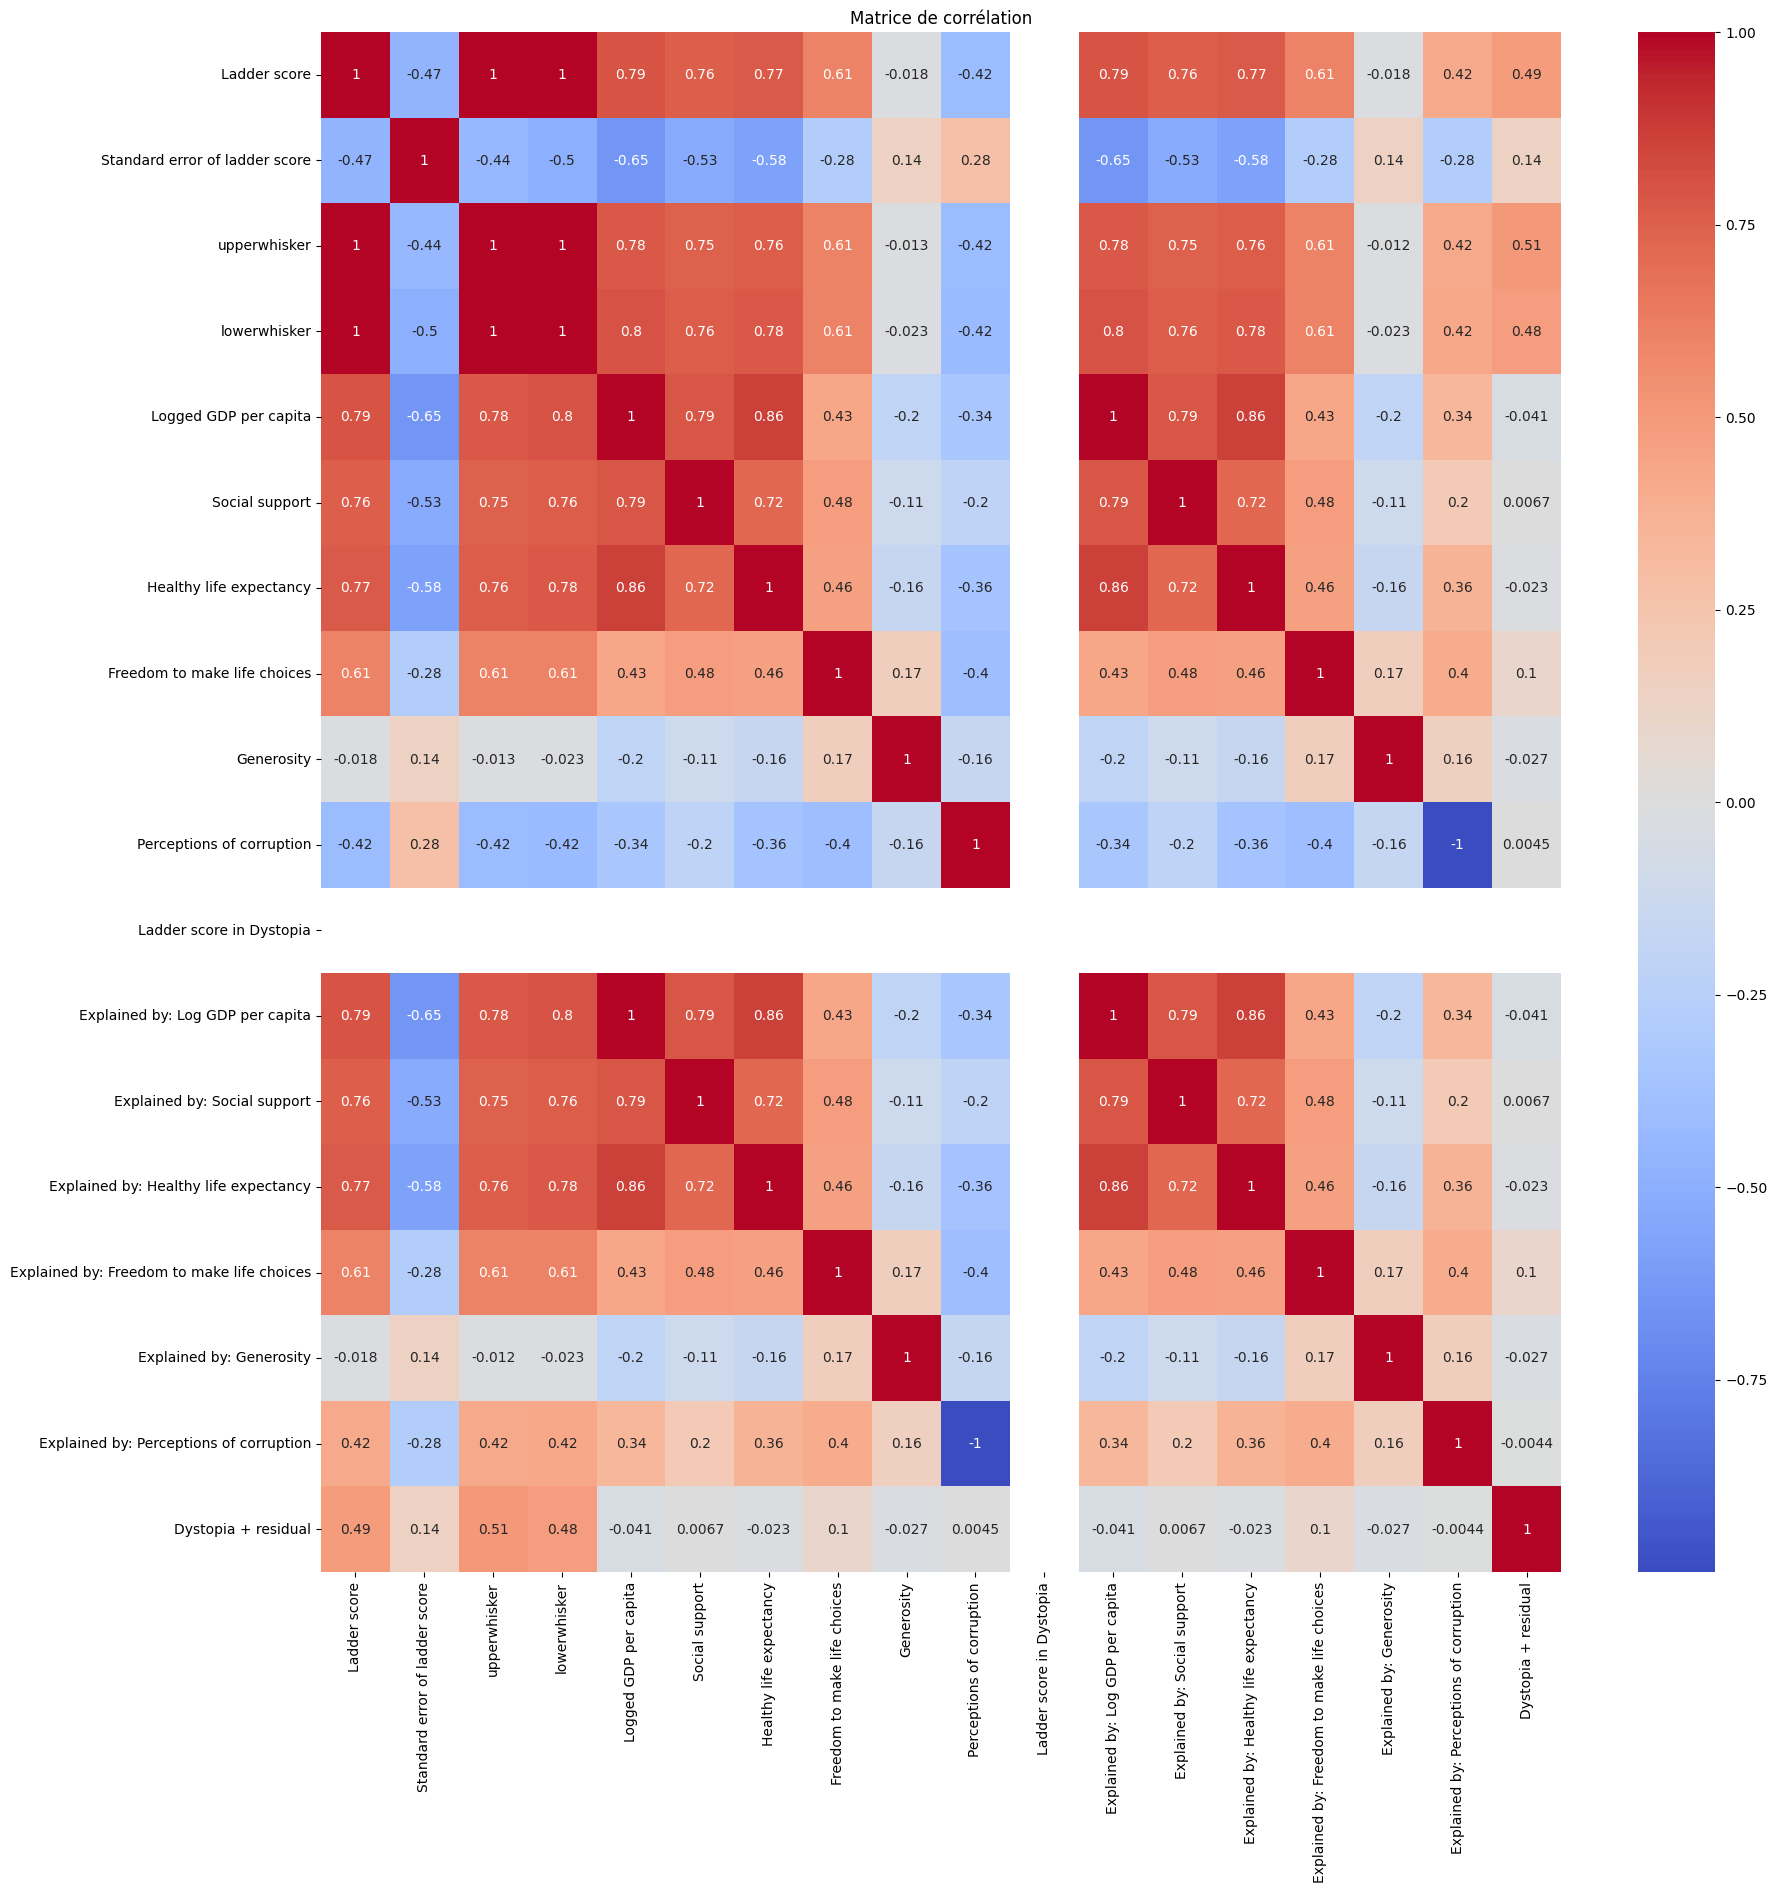

In [ ]:
#Matrice de correlation des variables de df1
fig = plt.figure(figsize=(20,20))
correlation_matrix = df1.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Matrice de corrélation")

plt.show()

Corrélation entre le bonheur et six facteurs potentiels

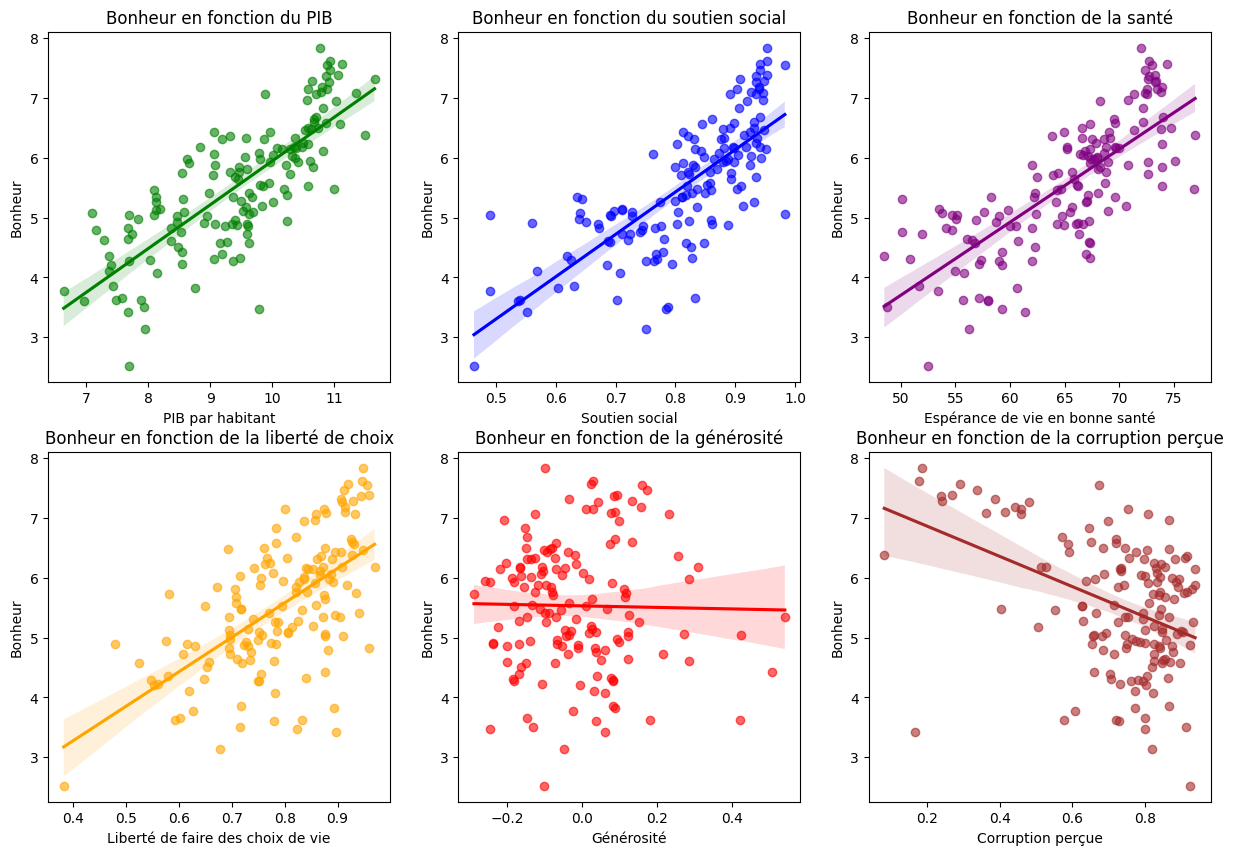

In [ ]:
#Définir la taille de la figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Créer les graphiques en utilisant la méthode scatterplot de Seaborn et ajouter la droite de régression
sns.regplot(ax=axes[0,0], x='Logged GDP per capita', y='Ladder score', data=df1, color='green', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[0,1], x='Social support', y='Ladder score', data=df1, color='blue', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[0,2], x='Healthy life expectancy', y='Ladder score', data=df1, color='purple', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,0], x='Freedom to make life choices', y='Ladder score', data=df1, color='orange', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,1], x='Generosity', y='Ladder score', data=df1, color='red', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,2], x='Perceptions of corruption', y='Ladder score', data=df1, color='brown', scatter_kws={'alpha': 0.6})

#Ajouter des titres et des étiquettes aux axes
axes[0,0].set_title('Bonheur en fonction du PIB', fontsize=12)
axes[0,1].set_title('Bonheur en fonction du soutien social', fontsize=12)
axes[0,2].set_title("Bonheur en fonction de la santé", fontsize=12)
axes[1,0].set_title('Bonheur en fonction de la liberté de choix', fontsize=12)
axes[1,1].set_title('Bonheur en fonction de la générosité', fontsize=12)
axes[1,2].set_title('Bonheur en fonction de la corruption perçue', fontsize=12)

axes[0,0].set_xlabel('PIB par habitant', fontsize=10)
axes[0,0].set_ylabel('Bonheur', fontsize=10)
axes[0,1].set_xlabel('Soutien social', fontsize=10)
axes[0,1].set_ylabel('Bonheur', fontsize=10)
axes[0,2].set_xlabel('Espérance de vie en bonne santé', fontsize=10)
axes[0,2].set_ylabel('Bonheur', fontsize=10)
axes[1,0].set_xlabel('Liberté de faire des choix de vie', fontsize=10)
axes[1,0].set_ylabel('Bonheur', fontsize=10)
axes[1,1].set_xlabel('Générosité', fontsize=10)
axes[1,1].set_ylabel('Bonheur', fontsize=10)
axes[1,2].set_xlabel('Corruption perçue', fontsize=10)
axes[1,2].set_ylabel('Bonheur', fontsize=10)

#Afficher la figure
plt.show()

La correlation des variable nous permettra de déterminer quelles sont les variables à maintenir dans le dataset df1.

**2. Dataset "df2"**











In [ ]:
#Prise de connaissance du dataset
display(df2.head())
print(df2.info())
print(df2.shape)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None
(1949

In [ ]:
#Manipulation pour visualiser l'évolution des ladder score par région

# Création de la colonne Regional indicator dans le df2
df2["Regional_indicator"] = np.nan
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional_indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,NaN
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN


In [ ]:
# Remplissage de la colonne avec les infos du df1
for index, val in enumerate(df2["Country name"]):
  region = df1.loc[df1["Country name"] == val, ["Regional indicator"]]

  if (not region.empty):
    df2["Regional_indicator"][index] = region["Regional indicator"].item()
  else:
    df2["Regional_indicator"][index] = np.nan

<ipython-input-13-6aa78cbcbfc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Regional_indicator"][index] = region["Regional indicator"].item()


In [ ]:
#Verification
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Regional_indicator                1886 non-null   object 
dtypes: flo

In [ ]:
# Séparation de régional_indicator par régions
df2_ssa = df2[df2['Regional_indicator'] == 'Sub-Saharan Africa']
df2_lac = df2[df2['Regional_indicator'] == 'Latin America and Caribbean']
df2_we = df2[df2['Regional_indicator'] == 'Western Europe']
df2_cee = df2[df2['Regional_indicator'] == 'Central and Eastern Europe']
df2_mena = df2[df2['Regional_indicator'] == 'Middle East and North Africa ']
df2_cis = df2[df2['Regional_indicator'] == 'Commonwealth of Independent States']
df2_sea = df2[df2['Regional_indicator'] == 'Southeast Asia']
df2_sa = df2[df2['Regional_indicator'] == 'South Asia']
df2_ea = df2[df2['Regional_indicator'] == 'East Asia']
df2_naanz = df2[df2['Regional_indicator'] == 'North America and ANZ']

In [ ]:
# Calcul de la moyenne des régions par année
df2_ssa_year = df2_ssa.groupby('year').agg({'Life Ladder' : 'mean'})
df2_lac_year = df2_lac.groupby('year').agg({'Life Ladder' : 'mean'})
df2_we_year = df2_we.groupby('year').agg({'Life Ladder' : 'mean'})
df2_cee_year = df2_cee.groupby('year').agg({'Life Ladder' : 'mean'})
df2_mena_year = df2_mena.groupby('year').agg({'Life Ladder' : 'mean'})
df2_cis_year = df2_cis.groupby('year').agg({'Life Ladder' : 'mean'})
df2_sea_year = df2_sea.groupby('year').agg({'Life Ladder' : 'mean'})
df2_sa_year = df2_sa.groupby('year').agg({'Life Ladder' : 'mean'})
df2_ea_year = df2_ea.groupby('year').agg({'Life Ladder' : 'mean'})
df2_naanz_year = df2_naanz.groupby('year').agg({'Life Ladder' : 'mean'})

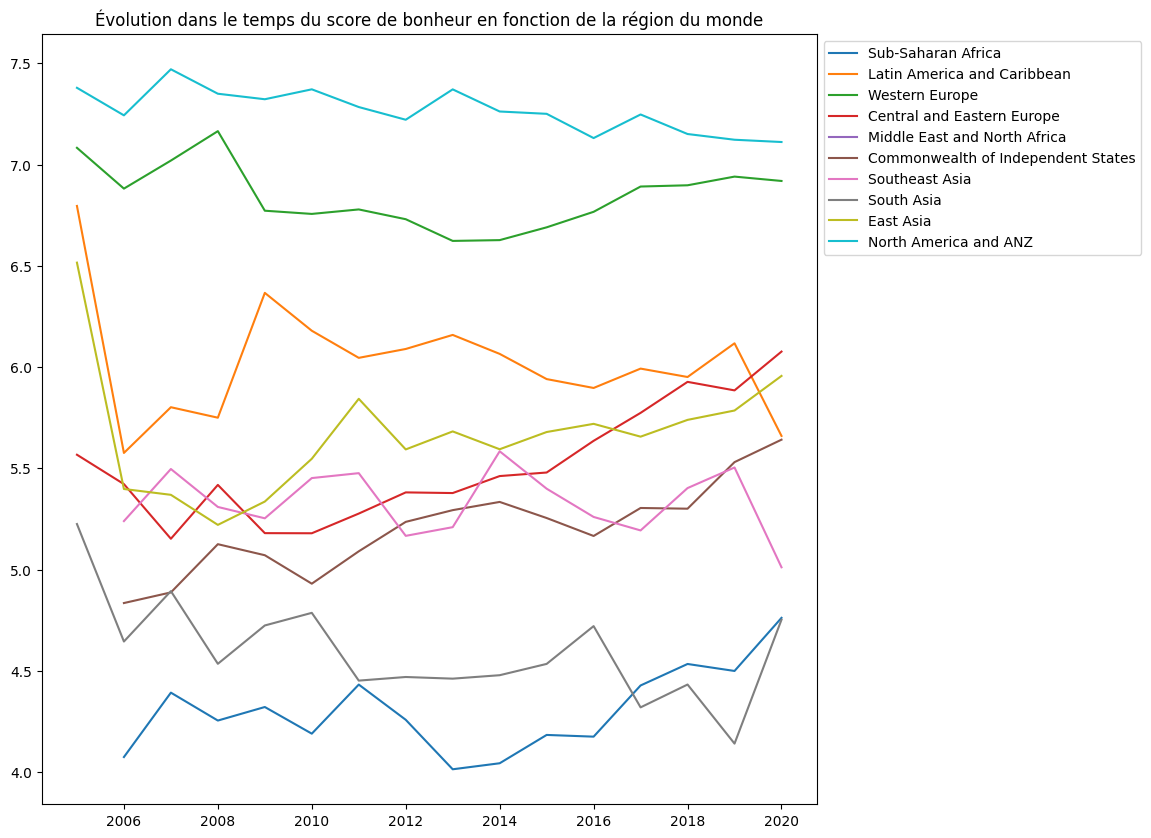

In [ ]:
# Affichage du graphique : score du bonheur par région par année
fig = plt.figure(figsize = (10,10))

plt.plot(df2_ssa_year.index, df2_ssa_year['Life Ladder'], label = 'Sub-Saharan Africa')
plt.plot(df2_lac_year.index, df2_lac_year['Life Ladder'], label = 'Latin America and Caribbean')
plt.plot(df2_we_year.index, df2_we_year['Life Ladder'], label = 'Western Europe')
plt.plot(df2_cee_year.index, df2_cee_year['Life Ladder'], label = 'Central and Eastern Europe')
plt.plot(df2_mena_year.index, df2_mena_year['Life Ladder'], label = 'Middle East and North Africa')
plt.plot(df2_cis_year.index, df2_cis_year['Life Ladder'], label = 'Commonwealth of Independent States')
plt.plot(df2_sea_year.index, df2_sea_year['Life Ladder'], label = 'Southeast Asia')
plt.plot(df2_sa_year.index, df2_sa_year['Life Ladder'], label = 'South Asia')
plt.plot(df2_ea_year.index, df2_ea_year['Life Ladder'], label = 'East Asia')
plt.plot(df2_naanz_year.index, df2_naanz_year['Life Ladder'], label = 'North America and ANZ')

plt.title("Évolution dans le temps du score de bonheur en fonction de la région du monde")
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#Manipulation de données pour l'évolution des 5 top pays / 5 pire pays par année:


# Sélectionner les 5 meilleurs et les 5 moins bons pays
top_countries = df2.groupby('Country name').mean().nlargest(5, 'Life Ladder').index
bottom_countries = df2.groupby('Country name').mean().nsmallest(5, 'Life Ladder').index



<ipython-input-27-2d9c51a18c3f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = df2.groupby('Country name').mean().nlargest(5, 'Life Ladder').index
<ipython-input-27-2d9c51a18c3f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottom_countries = df2.groupby('Country name').mean().nsmallest(5, 'Life Ladder').index


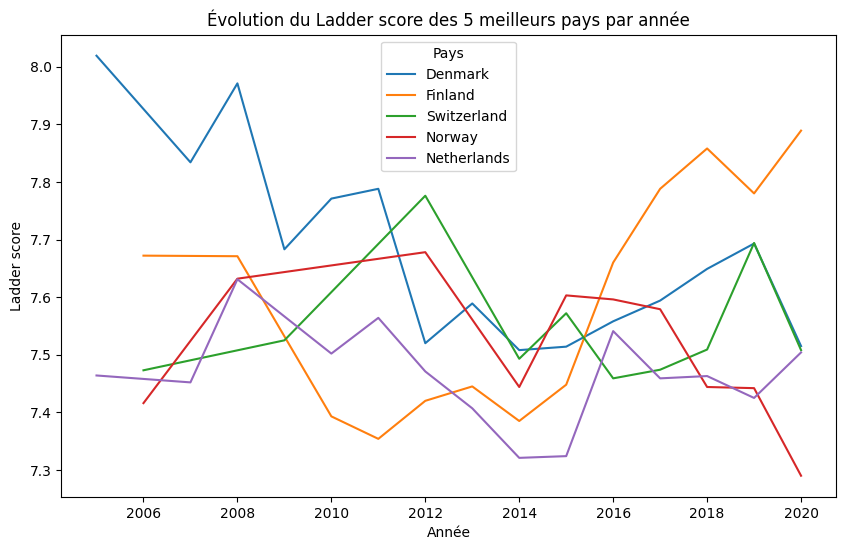

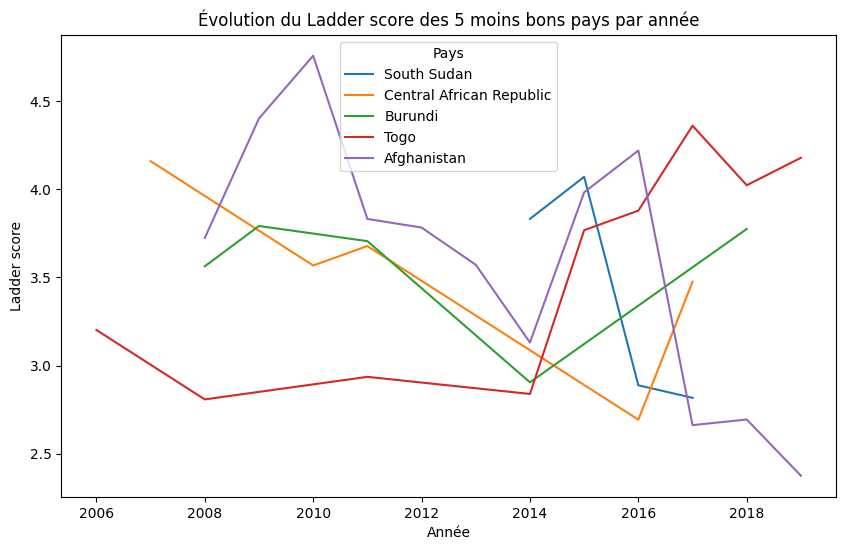

In [ ]:
# Créer le graphique pour les 5 meilleurs pays

#Boucle pour distinguer chaque pays pour la création des courbes
plt.figure(figsize=(10, 6))
for country in top_countries:
    df_country = df2[df2['Country name'] == country]
    sns.lineplot(data=df_country, x='year', y='Life Ladder', label=country)

plt.title("Évolution du Ladder score des 5 meilleurs pays par année")
plt.xlabel("Année")
plt.ylabel("Ladder score")
plt.legend(title='Pays')
plt.show()

# Créer le graphique pour les 5 moins bons pays

#Boucle pour distinguer chaque pays pour la création des courbes

plt.figure(figsize=(10, 6))
for country in bottom_countries:
    df_country = df2[df2['Country name'] == country]
    sns.lineplot(data=df_country, x='year', y='Life Ladder', label=country)

plt.title("Évolution du Ladder score des 5 moins bons pays par année")
plt.xlabel("Année")
plt.ylabel("Ladder score")
plt.legend(title='Pays')
plt.show()

Création une carte interactive à partir du Ladder score des pays
Pour cela il nous faudra :
- Determiner les latitude et longitudes de chaques pays
- Créer la carte

In [ ]:
#Import du module

!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import des packages
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

#Import des latitudes et longitudes dans des listes

geolocator = Nominatim(user_agent='myapplication')

latitudes = []
longitudes = []

#Boucle pour remplir les listes à partir des noms de pays du df1
for country in df1['Country name']:
    try:
        location = geolocator.geocode(country, timeout=10)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s" % (country, e))
        latitudes.append(None)
        longitudes.append(None)
        
#Coordonnées
coordinates = list(zip(latitudes, longitudes))

print(coordinates)


[(63.2467777, 25.9209164), (55.670249, 10.3333283), (46.7985624, 8.2319736), (64.9841821, -18.1059013), (52.2434979, 5.6343227), (61.1529386, 8.7876653), (59.6749712, 14.5208584), (49.8158683, 6.1296751), (-41.5000831, 172.8344077), (47.59397, 14.12456), (-24.7761086, 134.755), (30.8124247, 34.8594762), (51.1638175, 10.4478313), (61.0666922, -107.991707), (52.865196, -7.9794599), (10.2735633, -84.0739102), (54.7023545, -3.2765753), (49.7439047, 15.3381061), (39.7837304, -100.445882), (50.6402809, 4.6667145), (46.603354, 1.8883335), (26.1551249, 50.5344606), (35.8885993, 14.4476911), (None, None), (24.0002488, 53.9994829), (25.6242618, 42.3528328), (39.3260685, -4.8379791), (42.6384261, 12.674297), (46.1199444, 14.8153333), (15.5855545, -90.345759), (-32.8755548, -56.0201525), (1.357107, 103.8194992), (42.5869578, 20.9021231), (48.7411522, 19.4528646), (-10.3333333, -53.2), (23.6585116, -102.0077097), (18.1850507, -77.3947693), (55.3500003, 23.7499997), (34.9823018, 33.1451285), (58.752

In [ ]:
#Création dans le df1 de variables correspondant aux latitudes et longitudes des pays
df1['latitude']=latitudes
df1['longitude']=longitudes
df1.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,latitude,longitude,armed_conflicts
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,1.446,1.106,0.741,0.691,0.124,0.481,3.253,63.246778,25.920916,0
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,1.502,1.108,0.763,0.686,0.208,0.485,2.868,55.670249,10.333328,0
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,46.798562,8.231974,0
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,1.482,1.172,0.772,0.698,0.293,0.170,2.967,64.984182,-18.105901,0
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,1.501,1.079,0.753,0.647,0.302,0.384,2.798,52.243498,5.634323,0


In [ ]:
# Afficher les noms des pays qui ont des valeurs manquantes dans les colonnes "latitude" et "longitude"
missing_values = df1[df1["latitude"].isna() | df1["longitude"].isna()]["Country name"]
print(missing_values)

23     Taiwan Province of China
76    Hong Kong S.A.R. of China
Name: Country name, dtype: object


In [ ]:
# Correction des coordonnés (à poursuivre)
df1.loc[df1['Country name'] == 'Georgia', ['latitude', 'longitude']] = [42, 43.3]
df1.loc[df1['Country name'] == 'Taiwan Province of China', ['latitude', 'longitude']] = [25.03, 121.3]
df1.loc[df1['Country name'] == 'Hong Kong S.A.R. of China', ['latitude', 'longitude']] = [22.39, 114.109497]


Carte interactive du bien-être dans le monde

In [ ]:
#Installation du module pour la carte
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Affichage mapmonde (faire correspondre les noms des pays dans .json aux noms dans df)

import folium
import json

# Charger les données GeoJSON des pays
with open('world-countries.json') as f:
    geo_data = json.load(f)

# Créer une carte centrée sur le monde
m = folium.Map(location=[0, 0], zoom_start=2)

# Créer une fonction pour définir la couleur en fonction du score Ladder
def get_color(score):
    if score > 7.5:
        return 'darkgreen'
    elif score > 7:
        return 'green'
    elif score > 6.5:
        return 'lightgreen'
    elif score > 6:
        return 'yellow'
    elif score > 5.5:
        return 'orange'
    else:
        return 'red'

# Ajouter une couche de remplissage à la carte pour chaque pays
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=df1,
    columns=['Country name', 'Ladder score'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ladder Score',
    highlight=True,
    overlay=True,
    show=False,
).add_to(m)

# Parcourir le dataframe et ajouter un marqueur pour chaque pays
for index, row in df1.iterrows():
    pays = row['Country name']
    score = row['Ladder score']
    # Récupérer les coordonnées géographiques du pays
    coord = (row['latitude'], row['longitude'])
    # Ajouter un marqueur avec la couleur correspondante
    folium.Marker(location=coord, 
                  icon=folium.Icon(color=get_color(score)), 
                  tooltip=f"{pays}: {score}").add_to(m)

# Afficher la carte
m


<ipython-input-42-c9ce81ced7c1>:52: UserWarning: color argument of Icon should be one of: {'cadetblue', 'lightblue', 'beige', 'red', 'lightgreen', 'blue', 'gray', 'purple', 'darkblue', 'darkgreen', 'white', 'lightred', 'darkred', 'pink', 'green', 'orange', 'lightgray', 'black', 'darkpurple'}.
  icon=folium.Icon(color=get_color(score)),


Déplacez-vous sur la carte et glissez la souris sur un pays pour connaître son score de bien-être

**3. Visualisation de df_conflict**

Ces informations seront extraites du site wikipedia grâce au webscraping

In [ ]:
#Installation du module beautifulsoup
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import des package nécessaires
import requests
from bs4 import BeautifulSoup

In [ ]:
# Récupération des tableaux de la page wikipédia

wikiurl="https://en.wikipedia.org/wiki/List_of_armed_conflicts_in_2020"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

In [ ]:
# Création d'un dataframe par tableau
for index, table in enumerate(indiatable):
  globals()[f'df_{index}'] = pd.read_html(str(table))
  globals()[f'df_{index}'] = pd.DataFrame(globals()[f'df_{index}'][0])

In [ ]:
# Rassemblement des 4 dataframe
df_conflicts = pd.concat([df_0, df_1, df_2, df_3], ignore_index=True)

In [ ]:
# Renommage des colonnes afin de faciliter les manipulations
df_conflicts = df_conflicts.rename({'Start of conflict' : 'start_conflict', 'Conflict' : 'conflict', 'Continent' : 'continent', 'Location' : 'location', 'Fatalities in 2020' : 'fatalities'}, axis = 1)

Ces informations serton directement ajouter dans le df1_new , sous forme d'une nouvelle variable

In [ ]:
# Ajout et remplissage de la colonne 'armed_conflict' dans le df1 principal
df1['armed_conflicts'] = 0
for index, country in enumerate(df1['Country name']): 
  for loc in df_conflicts.location:
    if country in loc:
      df1.loc[index, 'armed_conflicts'] = 1

In [ ]:
# Vérification
df1.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,latitude,longitude,armed_conflicts
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,1.446,1.106,0.741,0.691,0.124,0.481,3.253,63.246778,25.920916,0
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,1.502,1.108,0.763,0.686,0.208,0.485,2.868,55.670249,10.333328,0
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,46.798562,8.231974,0
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,1.482,1.172,0.772,0.698,0.293,0.170,2.967,64.984182,-18.105901,0
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,1.501,1.079,0.753,0.647,0.302,0.384,2.798,52.243498,5.634323,0


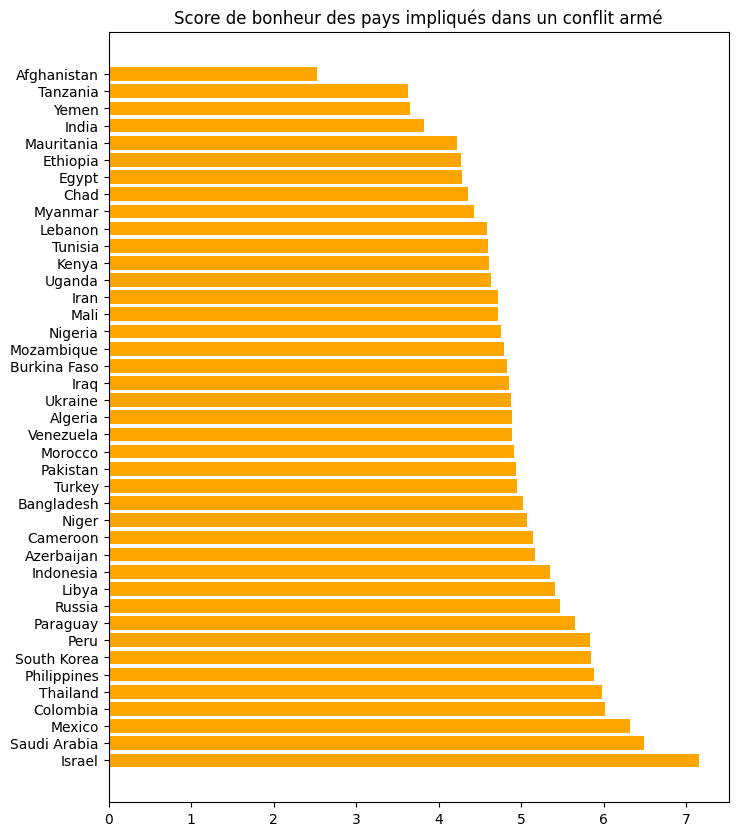

In [ ]:
# Graph du score de bonheur par pays impliqué dans un conflit armé
plt.figure(figsize = (8,10))
plt.barh(df1[df1['armed_conflicts'] == 1]['Country name'], df1[df1['armed_conflicts'] == 1]['Ladder score'], color = 'orange')
plt.title("Score de bonheur des pays impliqués dans un conflit armé")
plt.show()

*Test statistiques*

In [ ]:
# Description des pays en guerre
ls_ac = df1[df1['armed_conflicts'] == 1]['Ladder score']
ls_ac.describe()

count    41.000000
mean      4.965317
std       0.841813
min       2.523000
25%       4.596000
50%       4.887000
75%       5.410000
max       7.157000
Name: Ladder score, dtype: float64

In [ ]:
# Test de Student
from scipy.stats import ttest_ind

group1 = df1[df1['armed_conflicts'] == 1]
group2 = df1[df1['armed_conflicts'] == 0]

ttest_ind(group1['Ladder score'], group2['Ladder score'])

Ttest_indResult(statistic=-4.191020905896884, pvalue=4.772953333446102e-05)

In [ ]:
# Moyenne du ladder score selon la situation
print('moyenne du score de bonheur des pays impliqués dans un conflit armé :', df1[df1['armed_conflicts'] == 1]['Ladder score'].mean())
print('moyenne du score de bonheur des pays non impliqués dans un conflit armé :', df1[df1['armed_conflicts'] == 0]['Ladder score'].mean())

moyenne du score de bonheur des pays impliqués dans un conflit armé : 4.9653170731707315
moyenne du score de bonheur des pays non impliqués dans un conflit armé : 5.748287037037035


In [ ]:
# Écart-type du ladder score selon la situation
print('écart-type du score de bonheur des pays impliqués dans un conflit armé :', df1[df1['armed_conflicts'] == 1]['Ladder score'].std())
print('écart-type du score de bonheur des pays non impliqués dans un conflit armé :', df1[df1['armed_conflicts'] == 0]['Ladder score'].std())

écart-type du score de bonheur des pays impliqués dans un conflit armé : 0.8418129673218507
écart-type du score de bonheur des pays non impliqués dans un conflit armé : 1.0770578308732286


 **4. Visualisation df_chomage**

In [ ]:
#Prise de connaissance des données
print(df_chomage.shape)
print(df_chomage["Country Name"].nunique())

display(df_chomage.info())
display(df_chomage.head())

(235, 33)
235
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          23

None

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


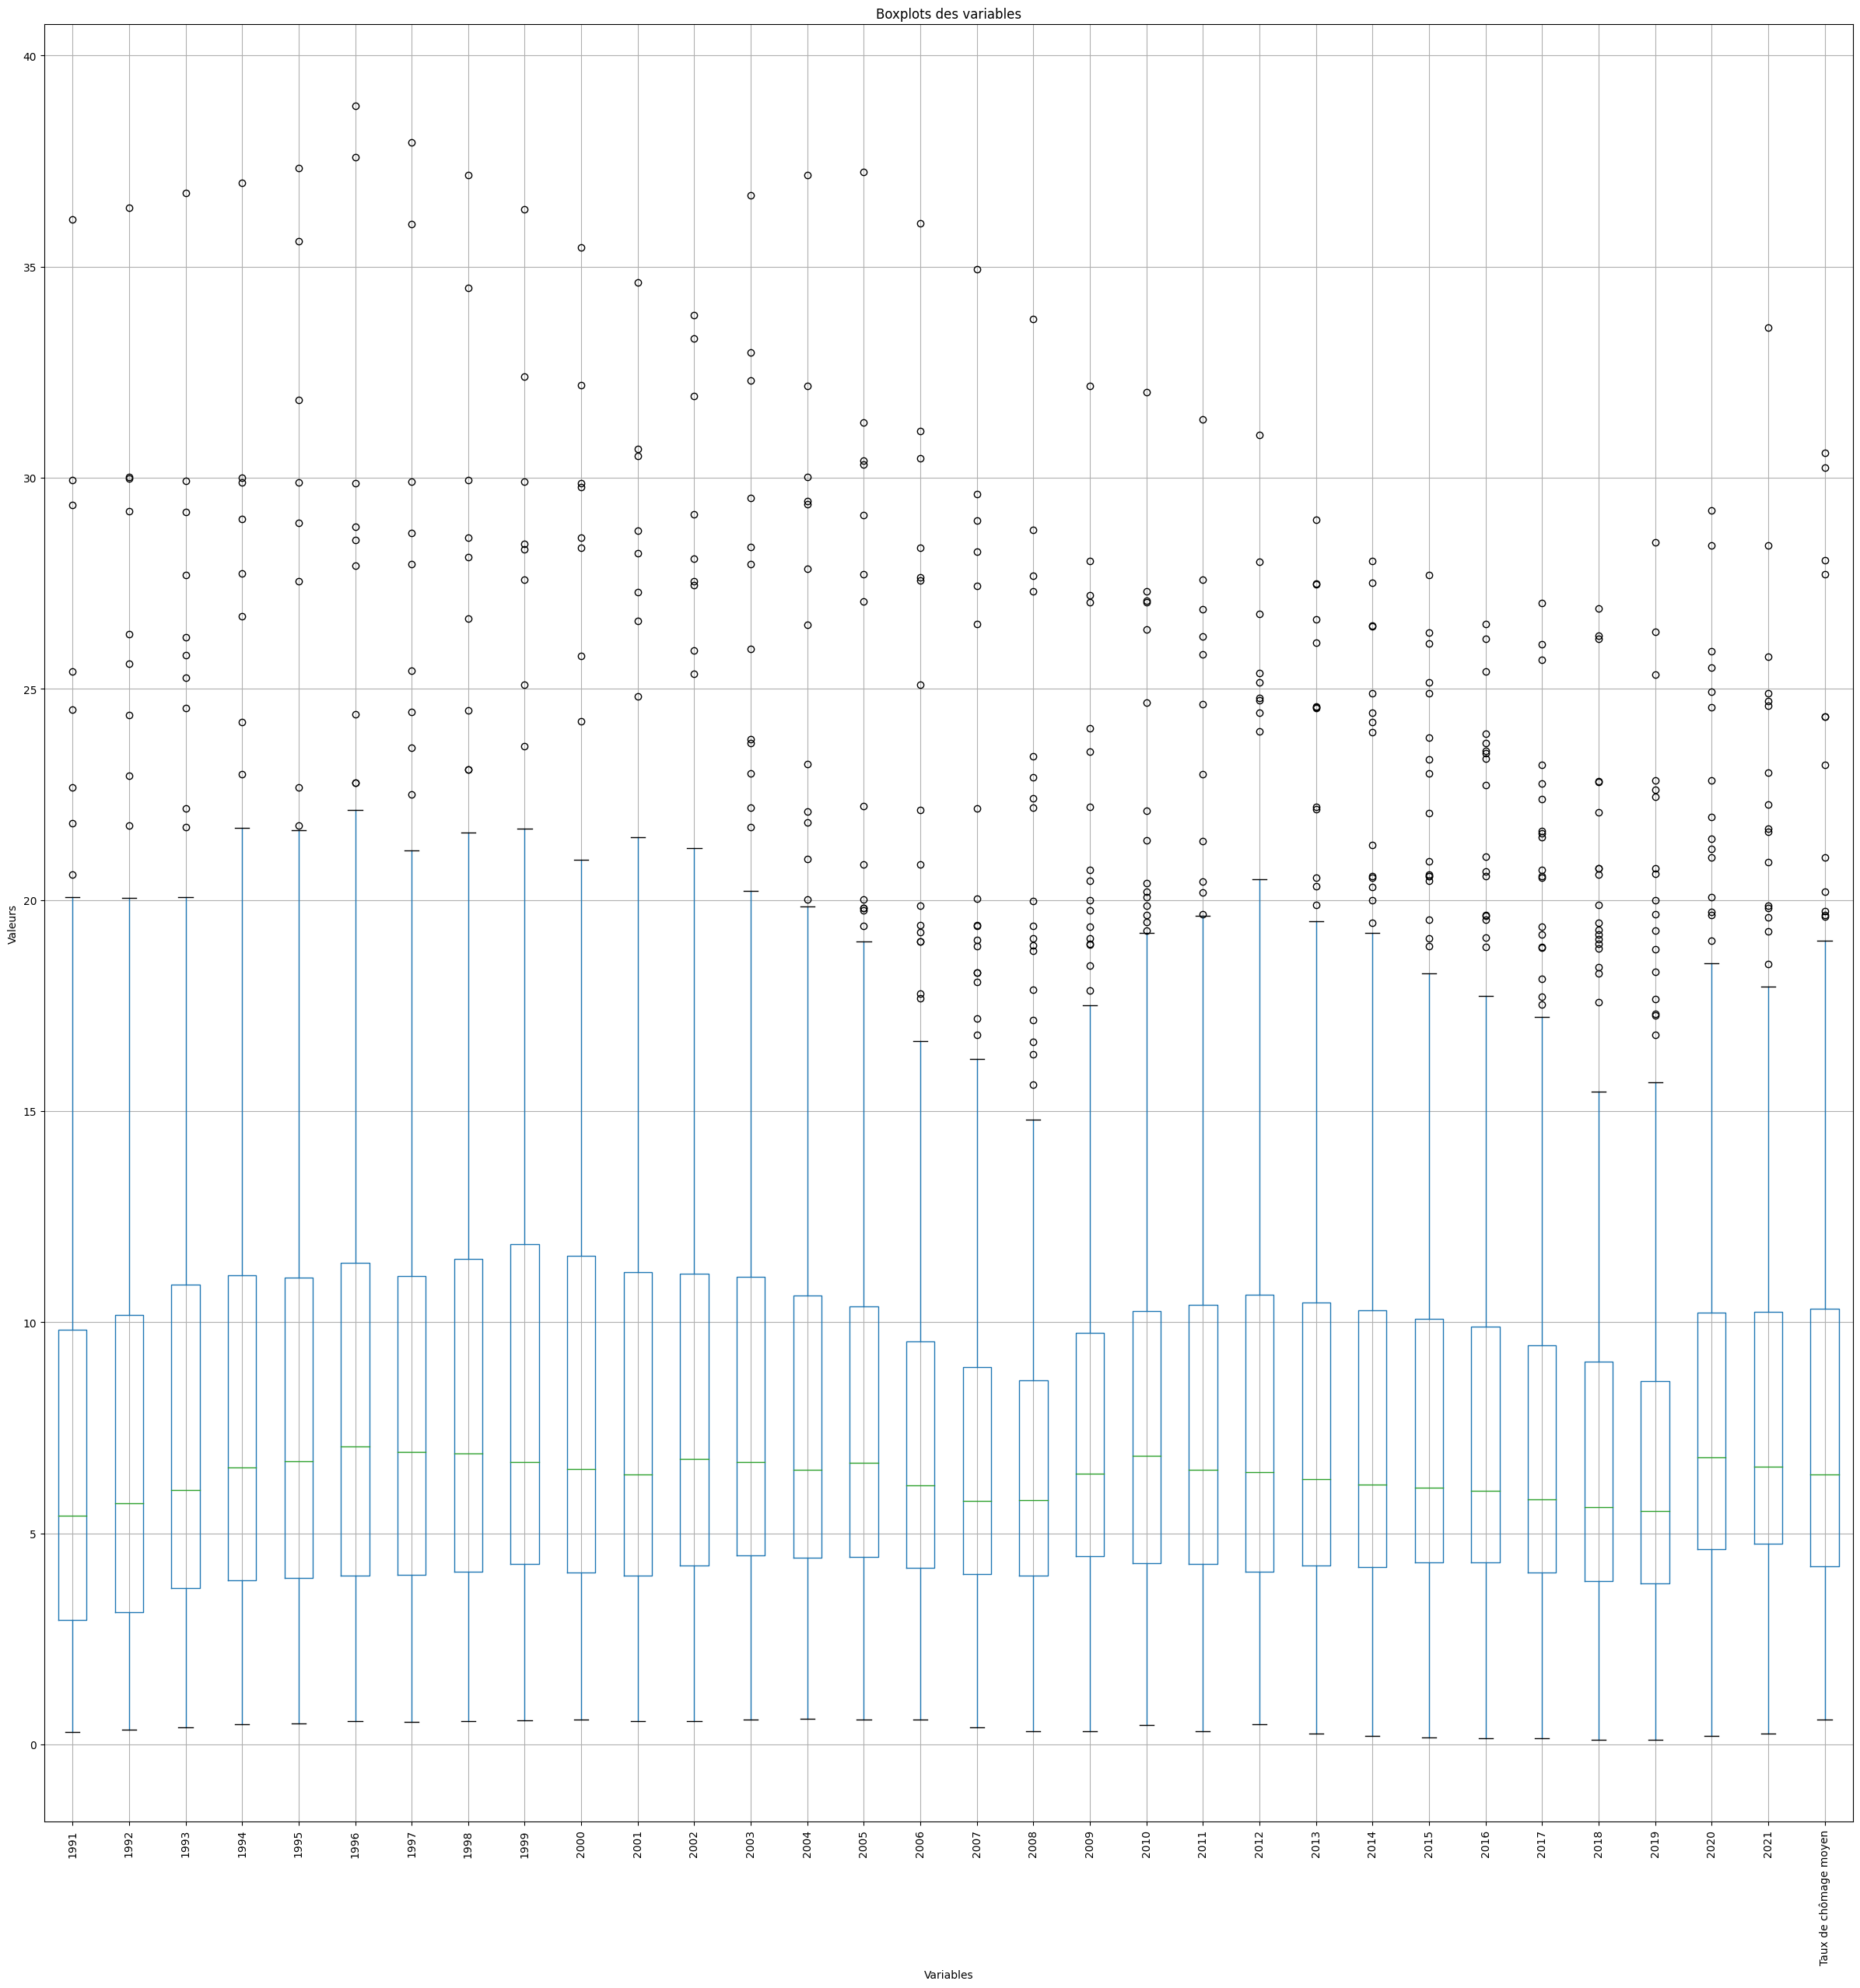

In [ ]:
#Boxplot des variables
fig = plt.figure(figsize=(30,30))
chomage.boxplot()
plt.title("Boxplots des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=90);

In [ ]:
#Manipulation de données pour faire des graphiques à partir du taux de chomage moyen

#stokage des années dans une variable 
donnees_chomage = chomage.iloc[:, 2:32]

#Creation d'une nouvelle colonne avec le taux de chomage mooyen
chomage['Taux de chômage moyen'] = donnees_chomage.mean(axis=1)
chomage.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Taux de chômage moyen
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,7.215333
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,11.070000
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,4.881000
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,5.349667
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,16.468000


In [ ]:
#Manipulation de données pour des graphiques au sujet des taux de chomage les plus élevé et les plus bas
#Trie df
chomage_trie = chomage.sort_values(by='Taux de chômage moyen', ascending=False)
pays_plus_eleves = chomage_trie.head(5)['Country Name']
pays_plus_bas = chomage_trie.tail(10)['Country Name']

donnees_plus_eleves = donnees_chomage[chomage['Country Name'].isin(pays_plus_eleves)]
donnees_plus_bas = donnees_chomage[chomage['Country Name'].isin(pays_plus_bas)]

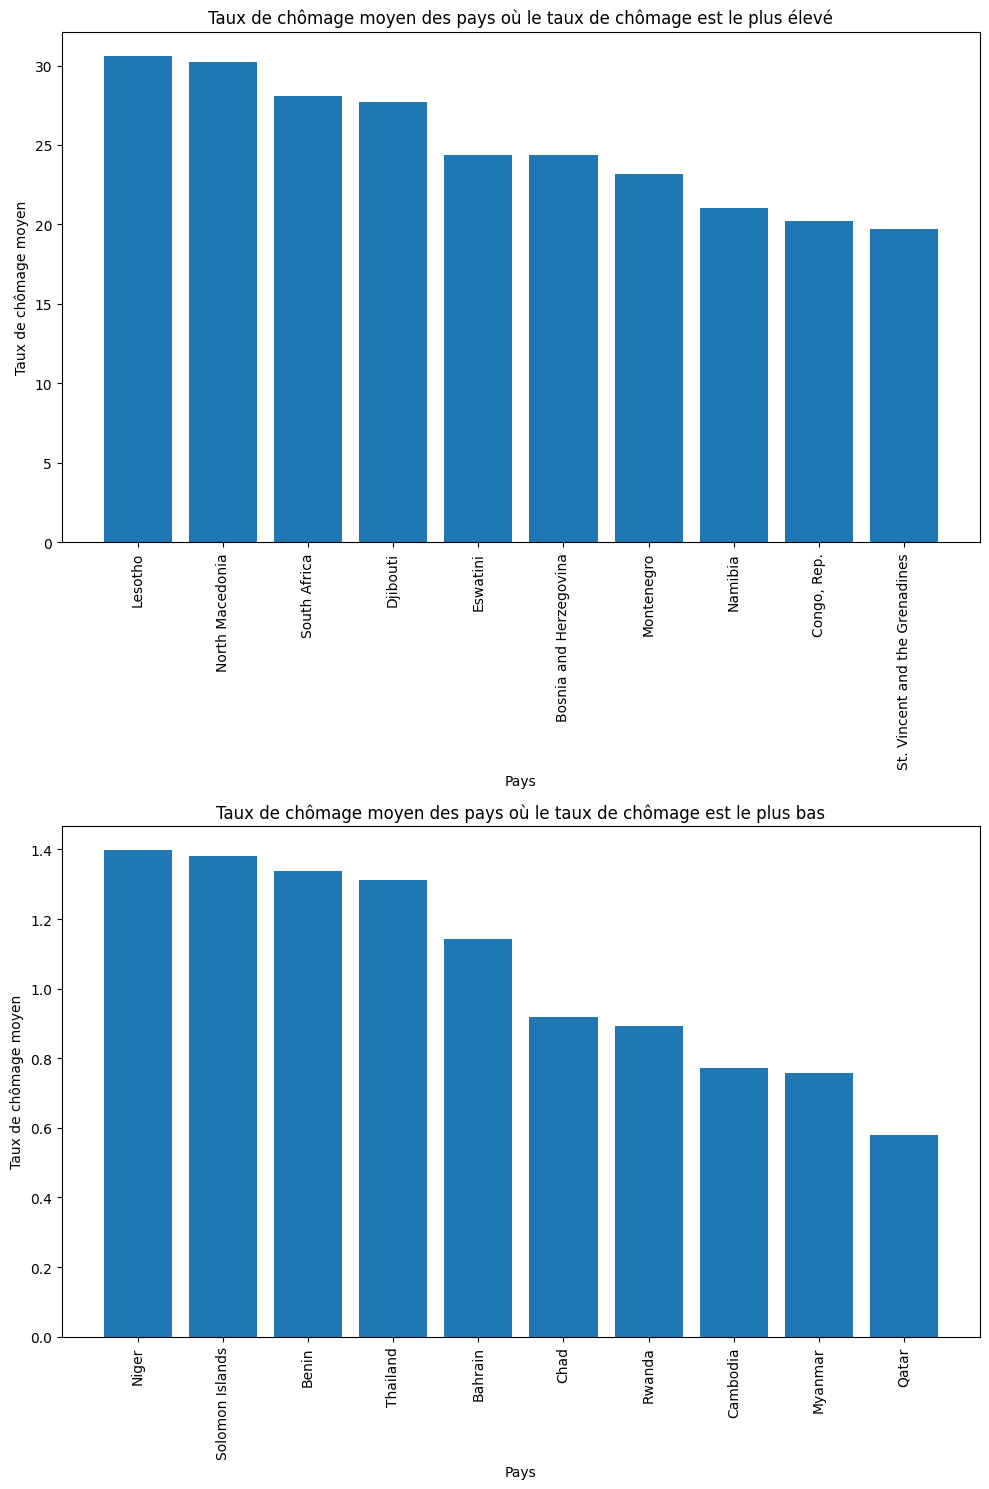

In [ ]:
#Graphiques taux de chomage

fig, axes = plt.subplots(nrows=2, figsize=(10, 15))

# 10 meilleurs
axes[0].bar(x=chomage_trie.head(10)['Country Name'], height=chomage_trie.head(10)['Taux de chômage moyen'])
axes[0].set_title('Taux de chômage moyen des pays où le taux de chômage est le plus élevé')
axes[0].set_xlabel('Pays')
axes[0].set_ylabel('Taux de chômage moyen')
axes[0].tick_params(axis='x', rotation=90)

# 10 moin bon
axes[1].bar(x=chomage_trie.tail(10)['Country Name'], height=chomage_trie.tail(10)['Taux de chômage moyen'])
axes[1].set_title('Taux de chômage moyen des pays où le taux de chômage est le plus bas')
axes[1].set_xlabel('Pays')
axes[1].set_ylabel('Taux de chômage moyen')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  # Ajustement automatique des espacements entre les sous-graphiques
plt.show()

 **5. Visualisations du df_final**


Dans un notebook différent, on pourra constater que le nettoyage et préprocessing a été fait afin que les données soient prêtes à la modélisation. Ainsi, le df1 deviendra "df_final". Nous avons fait quelques visualisation de ce **"df_final"**.

In [ ]:
#Importer le df

df_final = pd.read_csv('df_final.csv')

<ipython-input-124-5894e59fc51a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_final.corr()


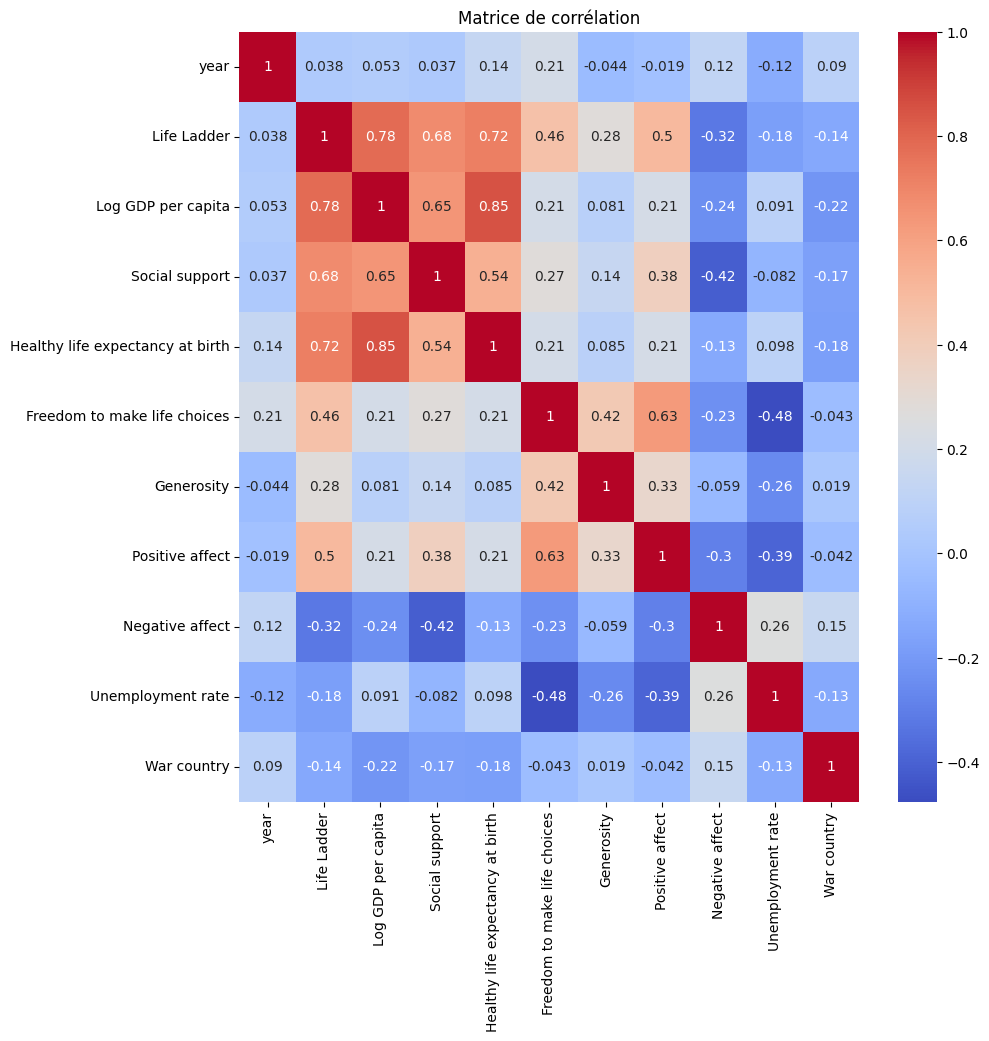

In [ ]:
#Création d'une matrice de correlation 

fig = plt.figure(figsize=(10,10))
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

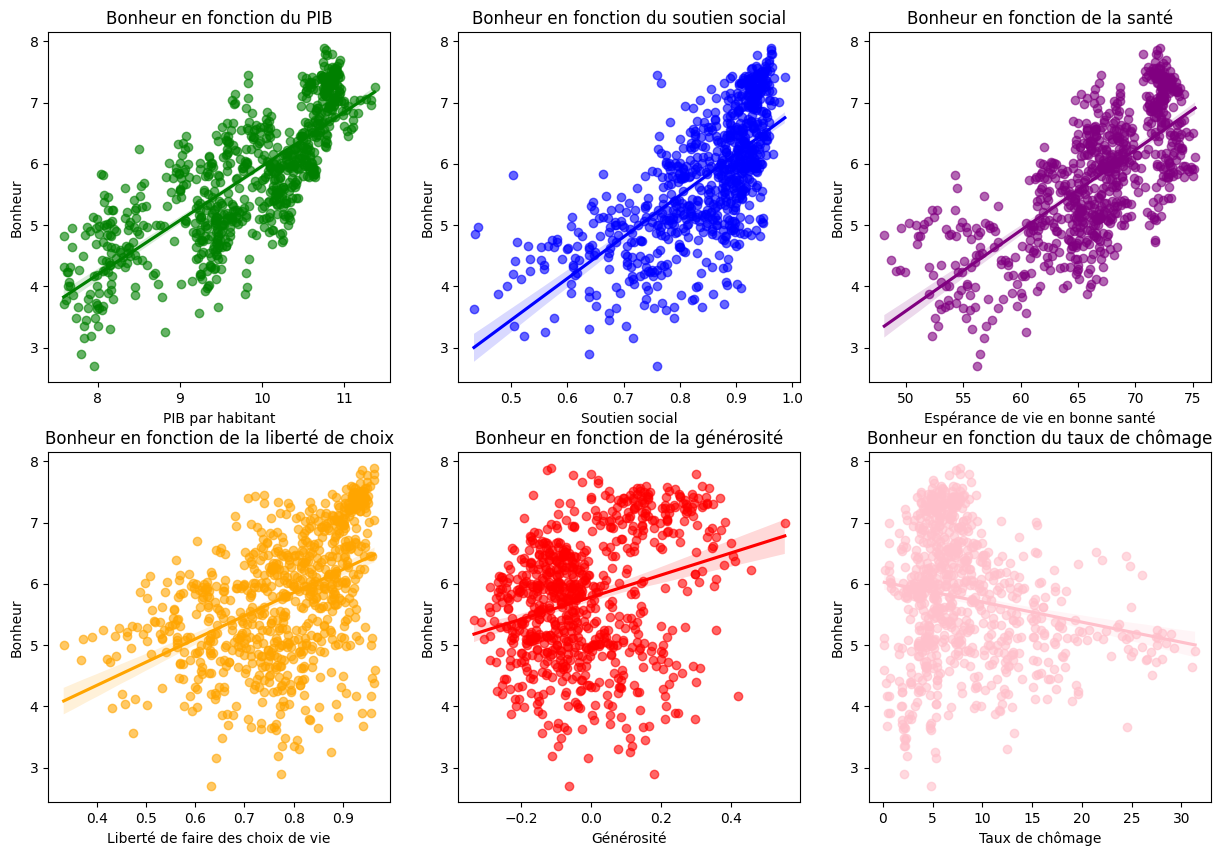

In [ ]:
#Correlation grâce aux nuages de points

#Définir la taille de la figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Créer les graphiques en utilisant la méthode scatterplot de Seaborn et ajouter la droite de régression
sns.regplot(ax=axes[0,0], x='Log GDP per capita', y='Life Ladder', data=df_final, color='green', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[0,1], x='Social support', y='Life Ladder', data=df_final, color='blue', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[0,2], x='Healthy life expectancy at birth', y='Life Ladder', data=df_final, color='purple', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,0], x='Freedom to make life choices', y='Life Ladder', data=df_final, color='orange', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,1], x='Generosity', y='Life Ladder', data=df_final, color='red', scatter_kws={'alpha': 0.6})
sns.regplot(ax=axes[1,2], x='Unemployment rate', y='Life Ladder', data=df_final, color='pink', scatter_kws={'alpha': 0.6})

#Ajouter des titres et des étiquettes aux axes
axes[0,0].set_title('Bonheur en fonction du PIB', fontsize=12)
axes[0,1].set_title('Bonheur en fonction du soutien social', fontsize=12)
axes[0,2].set_title("Bonheur en fonction de la santé", fontsize=12)
axes[1,0].set_title('Bonheur en fonction de la liberté de choix', fontsize=12)
axes[1,1].set_title('Bonheur en fonction de la générosité', fontsize=12)
axes[1,2].set_title('Bonheur en fonction du taux de chômage', fontsize=12)

axes[0,0].set_xlabel('PIB par habitant', fontsize=10)
axes[0,0].set_ylabel('Bonheur', fontsize=10)
axes[0,1].set_xlabel('Soutien social', fontsize=10)
axes[0,1].set_ylabel('Bonheur', fontsize=10)
axes[0,2].set_xlabel('Espérance de vie en bonne santé', fontsize=10)
axes[0,2].set_ylabel('Bonheur', fontsize=10)
axes[1,0].set_xlabel('Liberté de faire des choix de vie', fontsize=10)
axes[1,0].set_ylabel('Bonheur', fontsize=10)
axes[1,1].set_xlabel('Générosité', fontsize=10)
axes[1,1].set_ylabel('Bonheur', fontsize=10)
axes[1,2].set_xlabel('Taux de chômage', fontsize=10)
axes[1,2].set_ylabel('Bonheur', fontsize=10)

#Afficher la figure
plt.show()

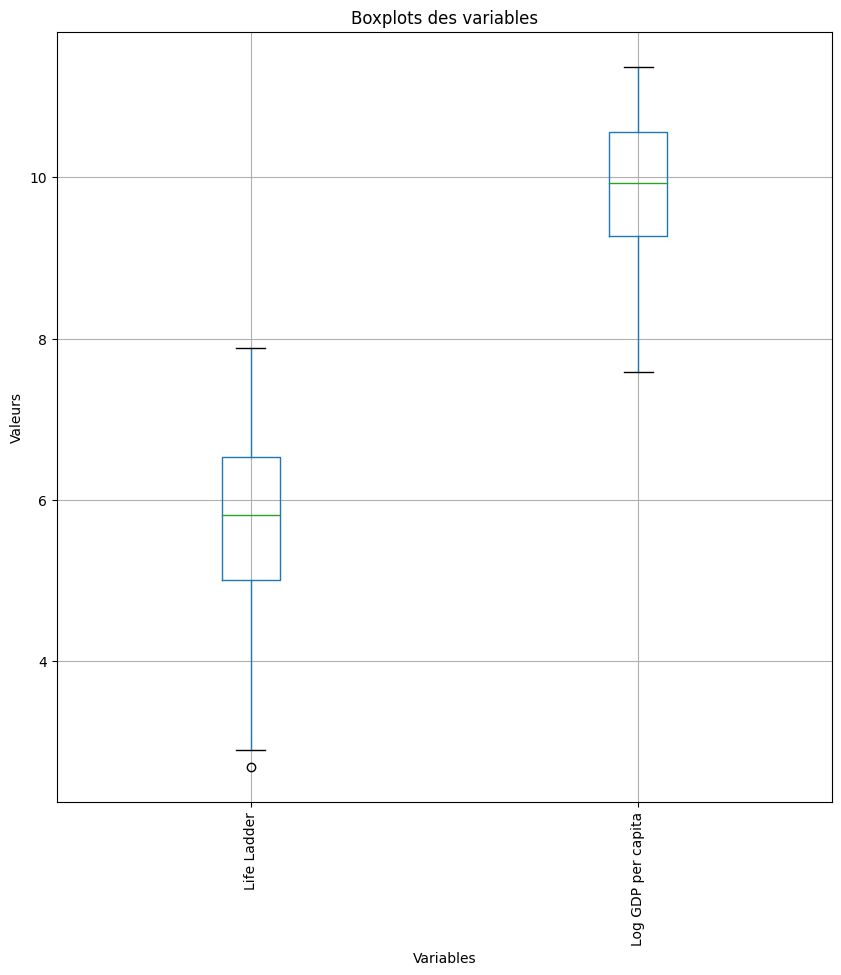

In [ ]:
#Box plot du df_final
box = df_final[['Life Ladder', 'Log GDP per capita']]

fig = plt.figure(figsize=(10,10))
box.boxplot()
plt.title("Boxplots des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=90);

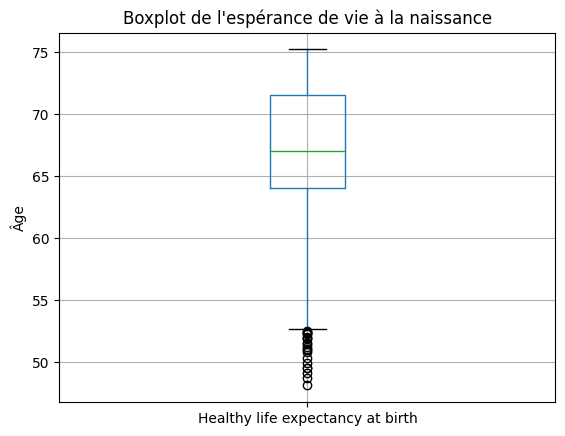

In [ ]:
#Boxplot de la variable esperance de vie
df_final.boxplot(column = 'Healthy life expectancy at birth')
plt.title("Boxplot de l'espérance de vie à la naissance")
plt.ylabel("Âge");

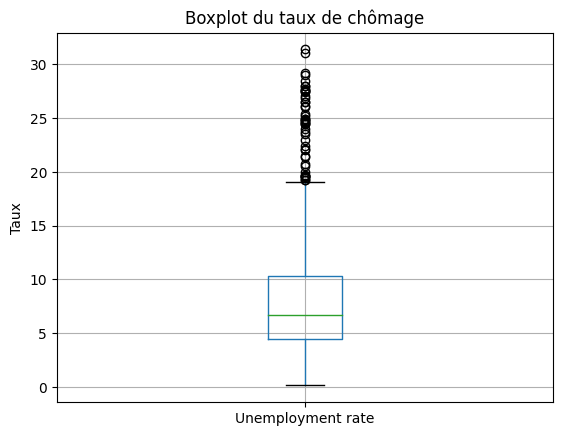

In [ ]:
#Boxplot de la variable unemployment rate

df_final.boxplot(column = 'Unemployment rate')
plt.title("Boxplot du taux de chômage")
plt.ylabel("Taux");

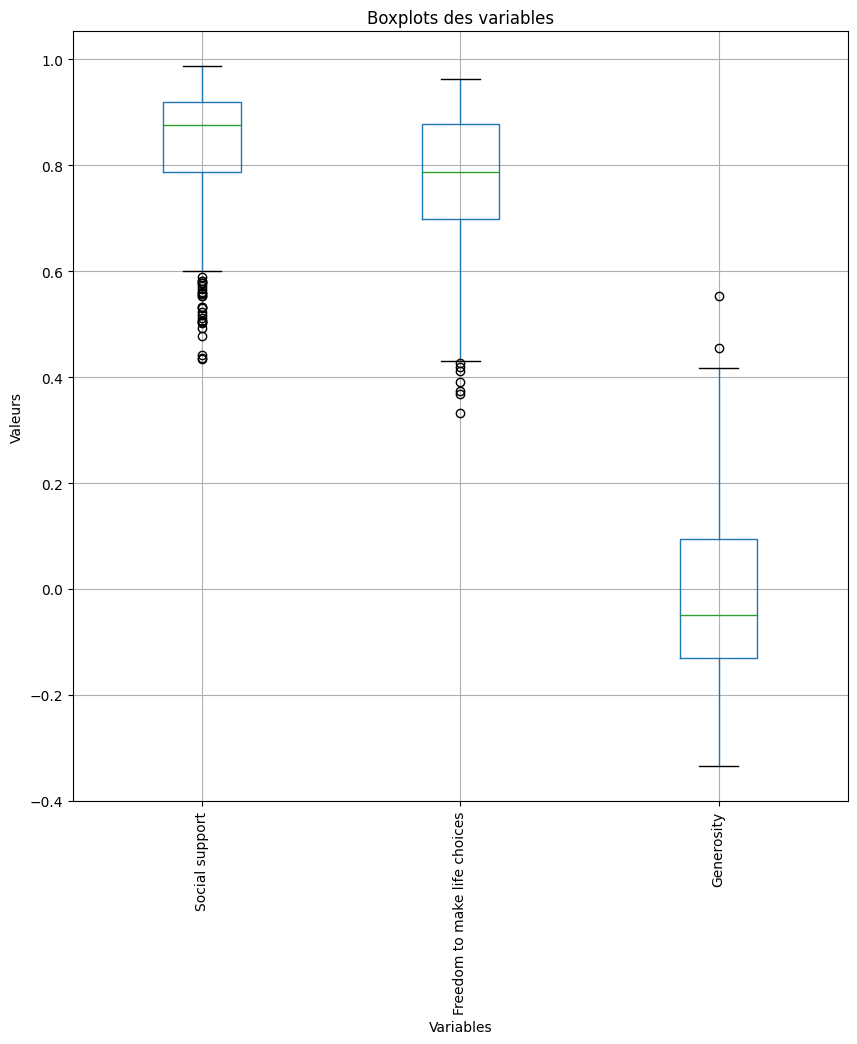

In [ ]:
#BOx plot des variables 'Social support', 'Freedom to make life choices', 'Generosity'
box = df_final[['Social support', 'Freedom to make life choices', 'Generosity']]
fig = plt.figure(figsize=(10,10))
box.boxplot()
plt.title("Boxplots des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=90);